This is a demo file trying to calculate the total mass in a given radius.

In [6]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
basePath ='../sims.TNG/TNG50-1/output'

main_subhalo_id=329508
main_halo_id=23

halos_fields=['Group_R_Crit200','Group_M_Crit200']
subhalos_fields=['SubhaloCM','SubhaloGrNr']
gas_cell_fields=['Coordinates','Masses']
stars_cell_fields=['Coordinates','Masses']

missing_data_snaps=[31,32,35]
full_snaps=[33,40,50,59,67,72,78,84,91,99]
Z_list=[2.32,2.00, 1.90,1.74,1.67,1.60,1.53,1.50,1.41,1.36,1.30,1.25,1.21,1.15,1.11,1.07,1.04,1.00,0.95,0.92,0.89,0.85,0.82,0.79,0.76,0.73,0.7,0.68,0.64,0.62,0.6,0.58,0.55,0.52,0.5,0.48,0.46,0.44,0.42,0.4,0.38,0.36,0.35,0.33,0.31,0.3,0.27,0.26,0.24,0.23,0.21,0.2,0.18,0.17,0.15,0.14,0.13,0.11,0.10,0.08,0.07,0.06,0.05,0.03,0.02,0.01,0.00]


In [2]:
def Binary_DataIter(Data_Set1,Data_Set2):
    for i in range(0,min(len(Data_Set1),len(Data_Set2))):
        yield Data_Set1[i],Data_Set2[i]

def mass_within_radius(Radius, Masses, Coordinates, CenterOfMass):
    # 计算每个恒星到质心的距离
    dist_to_com = np.sqrt(np.sum((Coordinates - CenterOfMass)**2, axis=1))

    # 找到距离质心小于R_200的所有恒星的下标
    within_radius_idx = np.where(dist_to_com <= Radius)[0]

    # 计算在R_200范围内的恒星总质量
    total_mass_within_radius = np.sum(Masses[within_radius_idx])

    return total_mass_within_radius


In [10]:
tree_fields=['SubfindID','SnapNum']
subfindid_snapnum_tree=il.sublink.loadTree(basePath, 99, 329508, fields=tree_fields, onlyMPB=True)


In [8]:
subfind_id=subfindid_snapnum_tree['SubfindID']
snapshot_num=subfindid_snapnum_tree['SnapNum']


In [ ]:
gas_mass_list=[]
stars_mass_list=[]
dm_mass_list=[]
snapshot_list=[]
for current_subfind_id,current_snapshot_num in Binary_DataIter(subfind_id,snapshot_num):
    if current_snapshot_num in missing_data_snaps: continue
    if current_snapshot_num < 30: break

    subhalo_data=il.groupcat.loadSubhalos(basePath,current_snapshot_num, fields=subhalos_fields)
    gas_cell_data=il.snapshot.loadSubhalo(basePath,current_snapshot_num,current_subfind_id,'gas',fields=gas_cell_fields)
    stars_cell_data=il.snapshot.loadSubhalo(basePath,current_snapshot_num,current_subfind_id,'stars',fields=stars_cell_fields)
    halos_data=il.groupcat.loadHalos(basePath, current_snapshot_num, fields=halos_fields)

    gas_cell_coordinates=gas_cell_data['Coordinates']
    gas_cell_masses=gas_cell_data['Masses']
    stars_cell_coordinates=stars_cell_data['Coordinates']
    stars_cell_masses=stars_cell_data['Masses']

    center_mass=subhalo_data['SubhaloCM'][current_subfind_id]
    halo_id=subhalo_data['SubhaloGrNr'][current_subfind_id]

    radius=halos_data['Group_R_Crit200'][halo_id]
    dm_mass=halos_data['Group_M_Crit200'][halo_id]

    Gas_Mass_In_Radius=mass_within_radius(radius, gas_cell_masses, gas_cell_coordinates, center_mass)
    Stars_Mass_In_Radius=mass_within_radius(radius,stars_cell_masses,stars_cell_coordinates,center_mass)

    gas_mass_list.append(Gas_Mass_In_Radius)
    stars_mass_list.append(Stars_Mass_In_Radius)
    dm_mass_list.append(dm_mass)
    snapshot_list.append(current_snapshot_num)
    print(Gas_Mass_In_Radius,Stars_Mass_In_Radius,dm_mass,current_snapshot_num)


([<matplotlib.axis.XTick at 0x7fcce76280b8>,
 <a list of 12 Text xticklabel objects>)

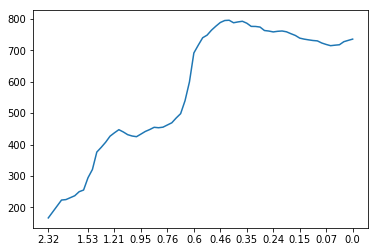

In [10]:
stars_mass_array=np.array([735.64703,
 731.62134,
 727.41583,
 717.67938,
 716.35236,
 714.71967,
 718.60492,
 723.23071,
 730.01367,
 731.24976,
 733.32135,
 735.61047,
 738.82263,
 747.37048,
 752.91693,
 758.92682,
 761.52795,
 760.54486,
 758.55438,
 761.3349,
 763.04816,
 774.05096,
 775.93048,
 776.19757,
 786.35089,
 792.46771,
 790.39905,
 787.73859,
 795.75024,
 794.89325,
 788.59229,
 776.96228,
 764.18634,
 748.31488,
 740.01331,
 716.36047,
 691.51398,
 599.31006,
 539.56421,
 498.20425,
 484.52936,
 469.13693,
 462.19797,
 455.19864,
 453.38672,
 454.76349,
 447.67746,
 441.61365,
 433.17783,
 424.90036,
 427.0553,
 431.29794,
 439.98233,
 447.18951,
 437.29688,
 426.47314,
 407.25974,
 390.9303,
 375.91806,
 320.33691,
 294.10971,
 254.97981,
 249.71606,
 236.79034,
 224.55959,
 223.13159,
 166.18633])
snapshot_array=np.array(snapshot_list)
z_array=np.flipud(np.array(Z_list))
plt.plot(snapshot_array,stars_mass_array)
plt.xticks(snapshot_array[::6],z_array[::6])


In [8]:
snapshot_list=[]
for current_subfind_id,current_snapshot_num in Binary_DataIter(subfind_id,snapshot_num):
    if current_snapshot_num in missing_data_snaps: continue
    if current_snapshot_num < 30: break
    snapshot_list.append(current_snapshot_num)


6.97821 99
4.93491 91
4.17018 84
3.16827 78
1.00876 72
1.30625 67
1.29969 59
2.66038 50
0.565712 40
0.564849 33


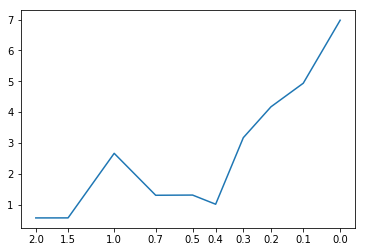

In [9]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
basePath ='./sims.TNG/TNG50-1/output'

main_subhalo_id=329508
main_halo_id=23

halos_fields=['Group_R_Crit200','Group_M_Crit200']
subhalos_fields=['SubhaloCM','SubhaloGrNr']
gas_cell_fields=['Coordinates','Masses','NeutralHydrogenAbundance']

missing_data_snaps=[31,32,35]
full_snaps=[33,40,50,59,67,72,78,84,91,99]

HI_mass_list=[]
snapshot_list=[]
for current_subfind_id,current_snapshot_num in Binary_DataIter(subfind_id,snapshot_num):
    if current_snapshot_num not in full_snaps: continue
    if current_snapshot_num < 30: break

    subhalo_data=il.groupcat.loadSubhalos(basePath,current_snapshot_num, fields=subhalos_fields)
    gas_cell_data=il.snapshot.loadSubhalo(basePath,current_snapshot_num,current_subfind_id,'gas',fields=gas_cell_fields)
    halos_data=il.groupcat.loadHalos(basePath, current_snapshot_num, fields=halos_fields)

    gas_cell_coordinates=gas_cell_data['Coordinates']
    gas_cell_masses=gas_cell_data['Masses']
    gas_cell_HIAbundance=gas_cell_data['NeutralHydrogenAbundance']
    gas_cell_HI_masses=gas_cell_masses*gas_cell_HIAbundance

    center_mass=subhalo_data['SubhaloCM'][current_subfind_id]
    halo_id=subhalo_data['SubhaloGrNr'][current_subfind_id]

    radius=halos_data['Group_R_Crit200'][halo_id]
    dm_mass=halos_data['Group_M_Crit200'][halo_id]

    HI_Mass_In_Radius=mass_within_radius(radius, gas_cell_HI_masses, gas_cell_coordinates, center_mass)

    HI_mass_list.append(HI_Mass_In_Radius)
    snapshot_list.append(current_snapshot_num)
    print(HI_Mass_In_Radius,current_snapshot_num)

plt.plot(snapshot_list,HI_mass_list)
new_x = [2,1.5,1,0.7,0.5,0.4,0.3,0.2,0.1,0]
new_x=np.flipud(np.array(new_x))
plt.xticks(snapshot_list, new_x)
plt.show()


In [11]:
tree_fields=['SubfindID','SnapNum']
subfindid_snapnum_tree=il.sublink.loadTree(basePath, 99, 329508, fields=tree_fields, onlyMPB=True)
subfind_id=subfindid_snapnum_tree['SubfindID']
print(subfind_id)


[329508 329045 325941 323872 322167 318956 315009 314669 309873 302211
 299817 295276 293174 289164 286487 280379 273994 271730 269975 268108
 264326 262399 260935 257844 254640 247555 250593 241928 232377 220165
 215980 214057 211991 209820 205211 184704 171321 170176 163331 162126
 158822 156135 157140 154894 152796 144633 145765 140683 156816 153494
 151763 145660 139042 130895 121961 120173 118400 119619 107743  98181
  99770  95286  88903  81233  73786  80035  74681  69878  70455  60695
  52413  46598  43668  47335  43126  59516  62481  49323  41369  35088
  29554  25162  36050  28415  24744  19723  11819   9261  37024  32301
  25961  20231  18981  14193   9425   7250  10708   5002   9308]
